In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import plotly.express as px
import seaborn as sns

In [96]:
damage_report = pd.read_csv("hw05-data/Damage Reports/mc1-reports-data.csv",low_memory=False)
damage_report

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-08 17:50:00,10.0,6.0,10.0,3.0,8.0,NaN,1
1,2020-04-09 13:50:00,2.0,10.0,0.0,8.0,4.0,0.0,1
2,2020-04-09 00:20:00,7.0,10.0,10.0,9.0,10.0,0.0,1
3,2020-04-08 17:25:00,1.0,1.0,2.0,10.0,7.0,NaN,1
4,2020-04-08 02:50:00,9.0,7.0,1.0,6.0,9.0,NaN,1
...,...,...,...,...,...,...,...,...
83065,2020-04-10 02:30:00,9.0,10.0,10.0,NaN,7.0,2.0,8
83066,2020-04-10 02:30:00,8.0,10.0,10.0,NaN,7.0,1.0,8
83067,2020-04-09 16:45:00,10.0,9.0,10.0,NaN,8.0,1.0,8
83068,2020-04-09 16:55:00,8.0,8.0,9.0,NaN,7.0,0.0,8


In [97]:
damage_report['time'] = pd.to_datetime(damage_report['time'])
# damage_report.set_index('time', inplace=True)
damage_report

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-08 17:50:00,10.0,6.0,10.0,3.0,8.0,NaN,1
1,2020-04-09 13:50:00,2.0,10.0,0.0,8.0,4.0,0.0,1
2,2020-04-09 00:20:00,7.0,10.0,10.0,9.0,10.0,0.0,1
3,2020-04-08 17:25:00,1.0,1.0,2.0,10.0,7.0,NaN,1
4,2020-04-08 02:50:00,9.0,7.0,1.0,6.0,9.0,NaN,1
...,...,...,...,...,...,...,...,...
83065,2020-04-10 02:30:00,9.0,10.0,10.0,NaN,7.0,2.0,8
83066,2020-04-10 02:30:00,8.0,10.0,10.0,NaN,7.0,1.0,8
83067,2020-04-09 16:45:00,10.0,9.0,10.0,NaN,8.0,1.0,8
83068,2020-04-09 16:55:00,8.0,8.0,9.0,NaN,7.0,0.0,8


In [98]:
damage_report_sorted = damage_report.sort_values(by='time')
damage_report_sorted

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
9945,2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17
529,2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2
4925,2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8
2460,2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4
8554,2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15
...,...,...,...,...,...,...,...,...
3761,2020-04-11,7.0,7.0,8.0,10.0,10.0,NaN,6
1310,2020-04-11,5.0,2.0,2.0,NaN,8.0,NaN,2
8582,2020-04-11,5.0,1.0,3.0,NaN,2.0,NaN,15
7343,2020-04-11,4.0,9.0,7.0,NaN,7.0,NaN,13


In [99]:
sth_neighborhood = gpd.read_file( "hw05-data/Sensor Data and Maps/StHimarkNeighborhoodShapefiles/StHimark.shp")
sth_neighborhood

,Id,Nbrhood,geometry
0,1,Palace Hills,"POLYGON ((-13351493.656 17391.306, -13352311.8..."
1,2,Northwest,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2,3,Old Town,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
3,4,Safe Town,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
4,5,Southwest,"POLYGON ((-13352257.891 15740.887, -13352311.8..."
5,6,Downtown,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
6,7,Wilson Forest,"POLYGON ((-13326281.927 6053.222, -13328243.84..."
7,8,Scenic Vista,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
8,9,Broadview,"POLYGON ((-13336454.829 1419.691, -13336684.69..."
9,10,Chapparal,"POLYGON ((-13335203.444 7716.247, -13335278.73..."


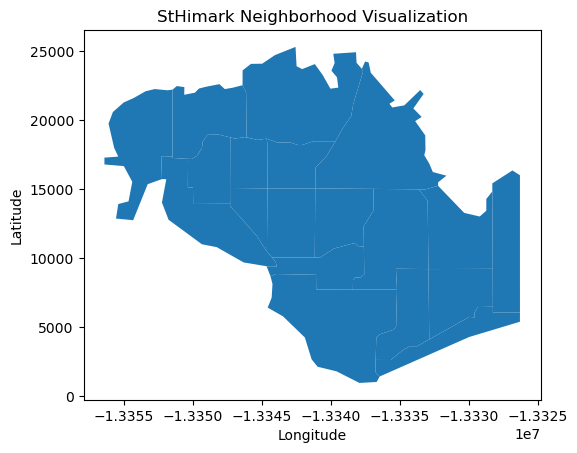

In [100]:
sth_neighborhood.plot()
plt.title("StHimark Neighborhood Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [101]:
sth_neighborhood = sth_neighborhood.rename(columns={"Id": "location"})
damage_report_wiz_neighborhoods = damage_report_sorted.merge(sth_neighborhood[['location', 'geometry']], how='left')
damage_report_wiz_neighborhoods

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location,geometry
0,2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17,"POLYGON ((-13344669.141 9416.998, -13344426.07..."
1,2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2,2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
3,2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
4,2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
...,...,...,...,...,...,...,...,...,...
83065,2020-04-11,7.0,7.0,8.0,10.0,10.0,NaN,6,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
83066,2020-04-11,5.0,2.0,2.0,NaN,8.0,NaN,2,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
83067,2020-04-11,5.0,1.0,3.0,NaN,2.0,NaN,15,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
83068,2020-04-11,4.0,9.0,7.0,NaN,7.0,NaN,13,"POLYGON ((-13333633.544 14998.643, -13332978.0..."


In [102]:
damage_report_wiz_neighborhoods.set_index('time')

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location,geometry
time,,,,,,,,
2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17,"POLYGON ((-13344669.141 9416.998, -13344426.07..."
2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
...,...,...,...,...,...,...,...,...
2020-04-11,7.0,7.0,8.0,10.0,10.0,NaN,6,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
2020-04-11,5.0,2.0,2.0,NaN,8.0,NaN,2,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2020-04-11,5.0,1.0,3.0,NaN,2.0,NaN,15,"POLYGON ((-13344655.638 18673.309, -13344617.0..."


In [103]:
damage_report_wiz_neighborhoods['geometry'] = damage_report_wiz_neighborhoods['geometry'].apply(lambda geom: geom.wkt)

In [104]:
damage_report_wiz_neighborhoods['time'] = pd.to_datetime(damage_report_wiz_neighborhoods['time'])
damage_report_wiz_neighborhoods.set_index('time', inplace=True)

# SAMPLE PLOT

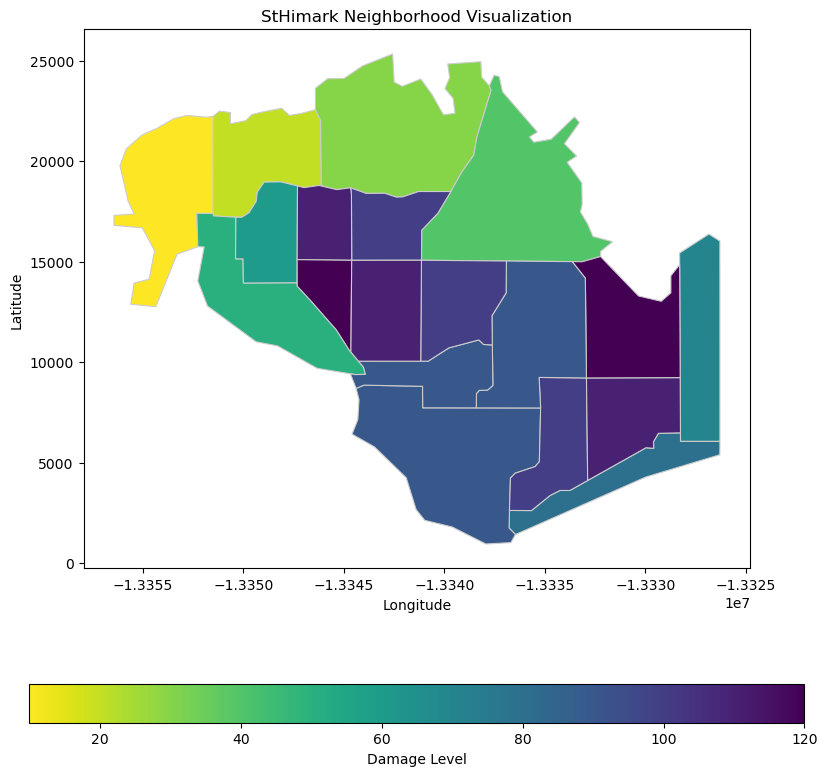

In [105]:
# example

sth_neighborhood['value'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 90, 100, 110, 120, 90, 100, 110]  # Replace with actual values

# Plotting with geopandas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sth_neighborhood.plot(column='value',  # The column for shading
                      cmap='viridis_r', 
                      linewidth=0.8, 
                      ax=ax, 
                      edgecolor='0.8',
                      legend=True,
                      legend_kwds={'label': "Damage Level", 'orientation': 'horizontal'})  # Set the legend's orientation
ax.set_title("StHimark Neighborhood Visualization")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


# Plot

In [106]:
# read data
damage_report = pd.read_csv("hw05-data/Damage Reports/mc1-reports-data.csv",low_memory=False)
sth_neighborhood = gpd.read_file( "hw05-data/Sensor Data and Maps/StHimarkNeighborhoodShapefiles/StHimark.shp")

# merg two datasets together
sth_neighborhood = sth_neighborhood.rename(columns={"Id": "location"})
combined_data = damage_report.merge(sth_neighborhood[['location', 'geometry','Nbrhood']], how='left')

# convert time to datetime and sort into ascending order
combined_data['time'] = pd.to_datetime(combined_data['time'])
combined_data = combined_data.sort_values(by='time')


In [107]:
# extract only month-day to calculate means
combined_data['month_day'] = combined_data['time'].dt.strftime('%m-%d')
combined_data = combined_data.drop(columns=['time'])

# Group by month_day and location and calculate the average for other columns
combined_data_mean = combined_data.groupby(['month_day', 'location', 'geometry','Nbrhood']).agg('mean').reset_index()

# Create a dictionary to store the separated DataFrames
separated_dfs = {}

# Iterate over unique month_day values and create separate DataFrames
for month_day in combined_data_mean['month_day'].unique():
    # Filter the DataFrame for each unique month_day
    month_day_df = combined_data_mean[combined_data_mean['month_day'] == month_day].copy()
    
    # Convert to GeoDataFrame
    separated_dfs[month_day] = gpd.GeoDataFrame(month_day_df, geometry='geometry')

# Now all dataframes in `separated_dfs` will be GeoDataFrames with 'geometry' as the geometry column


In [108]:
print(type(separated_dfs['04-08']))


<class 'geopandas.geodataframe.GeoDataFrame'>


In [109]:
# Now you can check the validity of the geometries
print(separated_dfs['04-08'].is_valid.all())

True


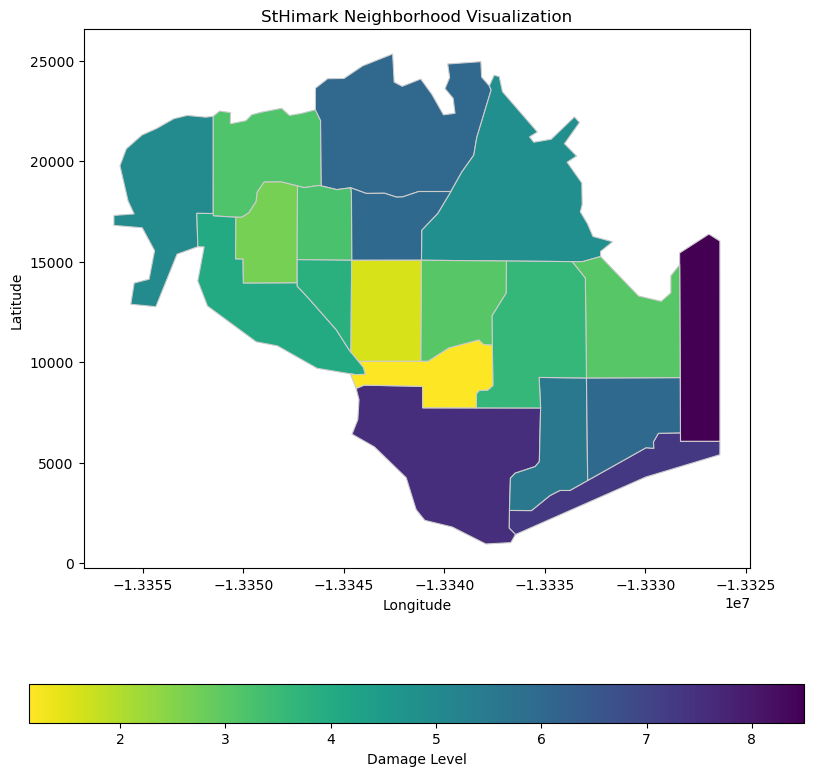

In [110]:
# Plotting with geopandas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
separated_dfs['04-08'].plot(column='sewer_and_water',  # The column for shading
                      cmap='viridis_r', 
                      linewidth=0.8, 
                      ax=ax, 
                      edgecolor='0.8',
                      legend=True,
                      legend_kwds={'label': "Damage Level", 'orientation': 'horizontal'})
ax.set_title("StHimark Neighborhood Visualization")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [130]:
# define a function that takes the dataframe and create the plot
def plot_data_by_variable(date, variable):
    """
    Plot the specified variable for a given GeoDataFrame.

    Parameters:
    data (GeoDataFrame): The data subset for a specific month_day.
    variable (str): The column name to be used for shading in the plot.
    """
    # Create a new figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Plotting with GeoPandas
    separated_dfs[date].plot(
        column=variable,       # The column chosen by the user for shading
        cmap='viridis_r', 
        linewidth=0.8, 
        ax=ax, 
        edgecolor='0.8', 
        legend=True,
        vmin=0,                # Set the minimum value for the color scale
        vmax=10,               # Set the maximum value for the color scale
        legend_kwds={'label': "Damage Level (0-10)", 'orientation': 'horizontal'} # Set the legend title
    )

    # Add labels for each polygon using the 'Nbrhood' and the variable value
    for idx, row in separated_dfs[date].iterrows():
        # Extract the coordinates of the polygon's centroid for label placement
        x, y = row['geometry'].centroid.coords[0]
        
        # Format the label with Nbrhood and the variable value
        label_text = f"{row['Nbrhood']}\n{row[variable]:.2f}"  # Label format: 'Nbrhood' and variable value rounded to 2 decimal places
        
        # Place the label in the plot
        ax.text(x, y, label_text, fontsize=10, ha='center', color='white', fontweight='bold')

    # Set title and labels
    ax.set_title(f"StHimark Neighborhood Damage Level for {variable} on {date}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    
    # Show the plot
    plt.show()


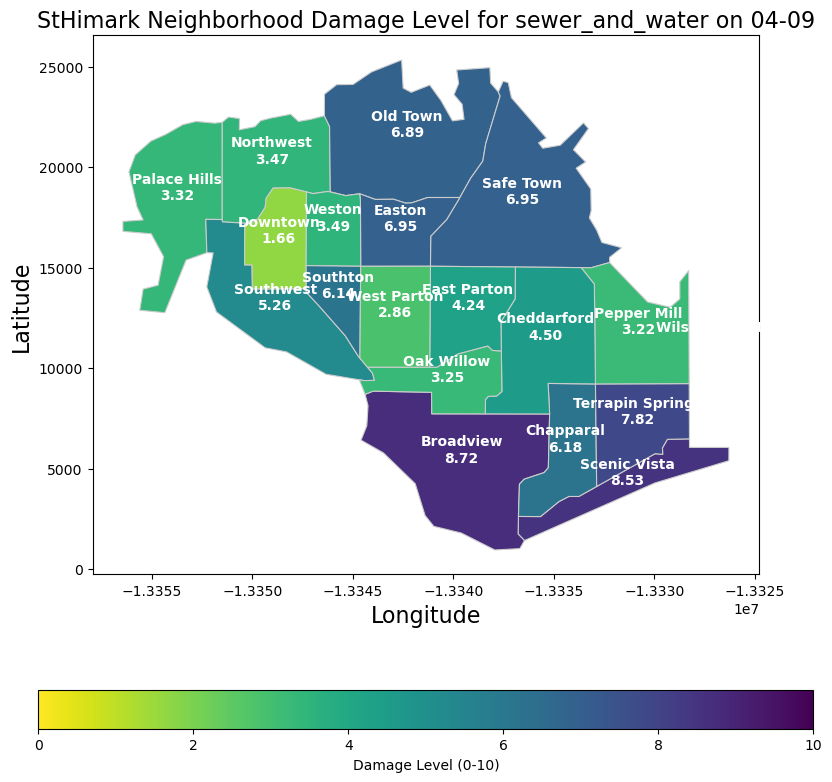

In [ ]:
# plot for sewer_and_water:
plot_data_by_variable('04-09', 'sewer_and_water')

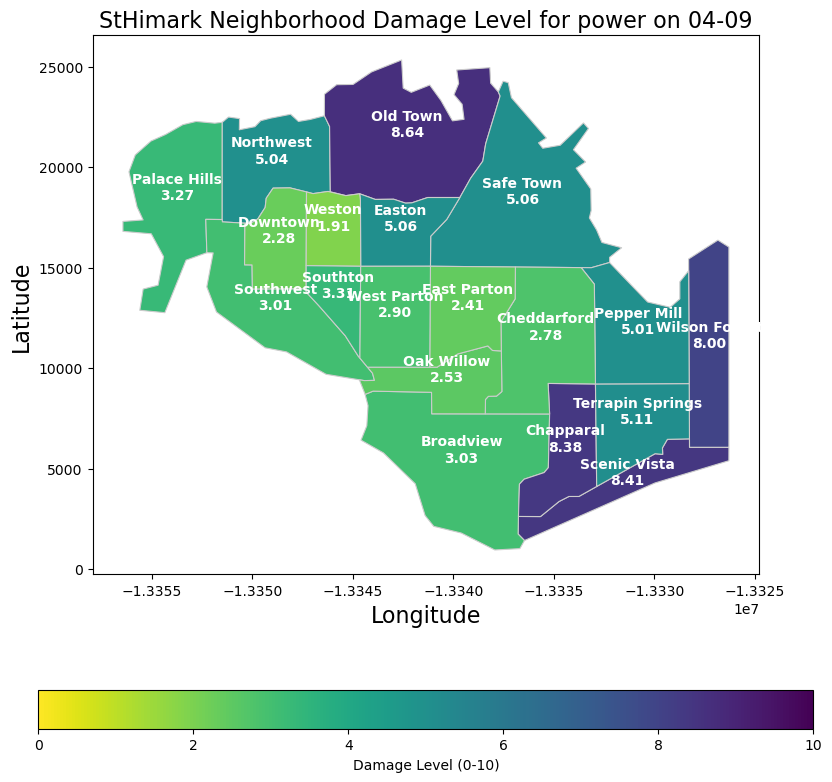

In [137]:
# plot for power:
plot_data_by_variable('04-09', 'power')